# Prediction Models
### This part is to train the prediction model. We use Logistic Regression, KNN, Random Forest, XGBoost and SVM to train models
### First, build feature vectors. Translate Heroes ID to Vector

In [1]:
# Run some setup code for this notebook.
from __future__ import print_function

import pandas as pd
import numpy as np
from progressbar import ProgressBar
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import xgboost as xgb
from sklearn import svm

In [2]:
df=pd.read_csv("out.csv")
df.head()

,radiant_win,duration,pre_game_duration,start_time,match_id,match_seq_num,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire,...,hero0,hero1,hero2,hero3,hero4,hero5,hero6,hero7,hero8,hero9
0,False,3142,90,1550086473,4419400000,3816332039,4,1540,3,3,...,86,14,44,85,51,121,7,111,104,18
1,True,2085,90,1550086473,4419400001,3816303710,1968,0,63,0,...,2,74,56,104,108,48,21,94,77,46
2,False,1754,60,1550086473,4419400002,3816295857,6,1958,51,63,...,21,109,6,15,74,7,94,35,62,47
3,True,2938,90,1550086478,4419400003,3816322234,1974,4,63,51,...,6,11,104,81,33,62,48,5,35,7
4,True,1505,90,1550086473,4419400005,3816295485,2039,0,63,0,...,84,13,35,108,69,81,62,15,25,94


In [3]:
#Translate heroes ID to a feature Vector
Vector_Data=[]

pbar = ProgressBar()
for i in pbar(range(0,len(df))):
    aa=np.zeros(250)
    for j in range(23,28):
        aa[df.iloc[i,j]]=1;
    for j in range(28,33):
        aa[df.iloc[i,j]+125]=1;
    Vector_Data.append(aa)

100% |########################################################################|


In [4]:
Vector_Data=pd.DataFrame(Vector_Data)
Vector_Data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Build training dataset and test dataset

In [5]:
X=Vector_Data
y=df["radiant_win"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [7]:
X_train.head(5)

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
101404,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14600,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
78454,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Logistic Regressio: Accuracy is 64%, Very fast

In [8]:
Logi_model=LogisticRegression(random_state=0, solver="newton-cg",
                              multi_class='multinomial').fit(X_train, y_train)

In [9]:
y_pred=Logi_model.predict(X_test)

In [10]:
#The accuracy of logistic regression
np.mean(y_pred == y_test)

0.641564557624384

In [11]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[ 4392  5355]
 [ 2865 10321]]
              precision    recall  f1-score   support

       False       0.61      0.45      0.52      9747
        True       0.66      0.78      0.72     13186

   micro avg       0.64      0.64      0.64     22933
   macro avg       0.63      0.62      0.62     22933
weighted avg       0.64      0.64      0.63     22933



In [12]:
x=np.arange(2000,80000,2000)
accuracies=[]
for i in x:
    Logi_model = Logi_model.fit(X_train[0:i],y_train[0:i])
    y_pred=Logi_model.predict(X_test)    
    accuracies.append(np.mean(y_pred == y_test))

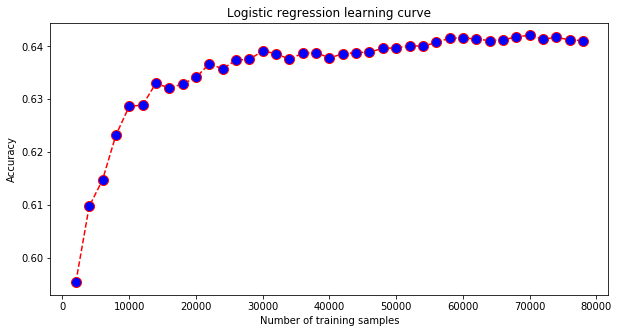

In [13]:
plt.figure(figsize=(10, 5))  
plt.plot(x, accuracies, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Logistic regression learning curve')  
plt.xlabel('Number of training samples')  
plt.ylabel('Accuracy')  
plt.show()

### K Nearest Neighbors: Accuracy 62%, Very  slow
KNN is very slow. Basically, the best K is between 80 to 100 and the accuracy is 62%

In [14]:
accuracy = []
k=[]
# Calculating error for K values between 1 and 100
for i in range(1, 100,5):  
    print(i)
    knn = KNeighborsClassifier(n_neighbors=i,n_jobs=12)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test[0:1000])
    accuracy.append(np.mean(y_pred == y_test[0:1000]))
    k.append(i)

1
6
11
16
21
26
31
36
41
46
51
56
61
66
71
76
81
86
91
96


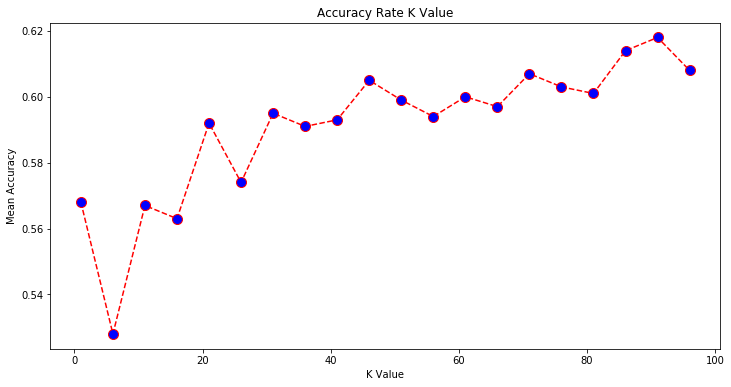

In [16]:
plt.figure(figsize=(12, 6))  
plt.plot(k,accuracy, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Accuracy')  
plt.show()

### Random Forest: Accuracy 61%, Fast

In [17]:
rfModel = RandomForestRegressor(n_estimators=100,n_jobs=12)
rfModel.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=12,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [18]:
y_pred=rfModel.predict(X_test)
yT=[]
for i in range(0,len(y_pred)):
    if(y_pred[i]>=0.5):
        yT.append(True)
    else:
        yT.append(False)

In [19]:
np.mean(yT == y_test)

0.6110844634369685

In [20]:
X_train.shape

(91731, 250)

In [21]:
X_test.shape

(22933, 250)

In [22]:
accuracy = []
n_tree=[]
for i in range(10, 210,10):  
    print(i)
    n_tree.append(i)
    rfModel = RandomForestRegressor(n_estimators=i,n_jobs=12)
    rfModel.fit(X_train,y_train)
    y_pred=rfModel.predict(X_test)
    yT=[]
    for i in range(0,len(y_pred)):
        if(y_pred[i]>=0.5):
            yT.append(True)
        else:
            yT.append(False)
    accuracy.append(np.mean(yT == y_test))


10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200


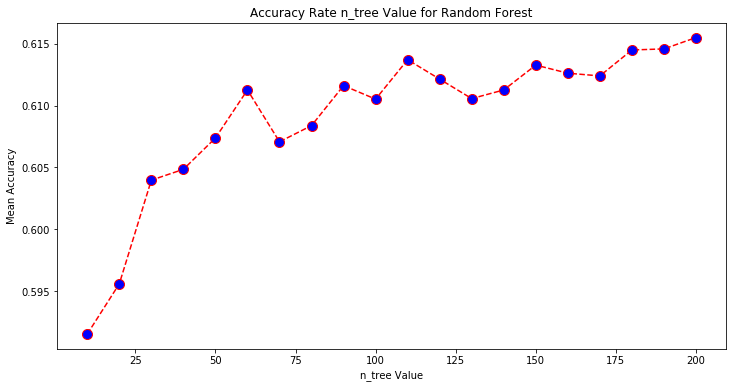

In [23]:
plt.figure(figsize=(12, 6))  
plt.plot(n_tree,accuracy, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Rate n_tree Value for Random Forest')  
plt.xlabel('n_tree Value')  
plt.ylabel('Mean Accuracy')  
plt.show()

### XGBoost Model: Accuracy 66%, Fast

In [24]:
xgb_cl = xgb.XGBClassifier(learning_rate=0.1,n_job=12)

In [25]:
xgb_cl.fit(X_train,y_train)
y_pred = xgb_cl.predict(X_test)

In [26]:
np.mean(y_pred==y_test)

0.6204159944185236

In [34]:
accuracy = []
learning_rate=[]
for i in range(5, 80,5):  
    l=i/100
    print(i)
    learning_rate.append(l)
    xgb_cl = xgb.XGBClassifier(learning_rate=l,n_job=12)
    xgb_cl.fit(X_train,y_train)
    y_pred = xgb_cl.predict(X_test)
    accuracy.append(np.mean(y_pred==y_test))

5
10
15
20
25
30
35
40
45
50
55
60
65
70
75


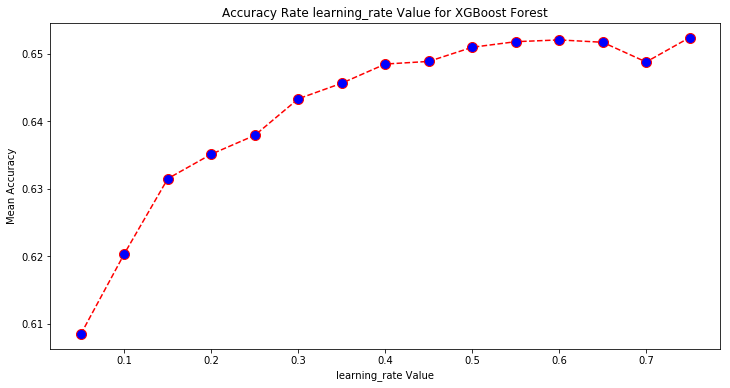

In [35]:
plt.figure(figsize=(12, 6))  
plt.plot(learning_rate,accuracy, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Rate learning_rate Value for XGBoost Forest')  
plt.xlabel('learning_rate Value')  
plt.ylabel('Mean Accuracy')  
plt.show()

In [37]:
accuracy = []
n_estimators=[]
for i in range(50, 1000,50):  
    print(i)
    n_estimators.append(i)
    xgb_cl = xgb.XGBClassifier(n_estimators=i,n_job=12)
    xgb_cl.fit(X_train,y_train)
    y_pred = xgb_cl.predict(X_test)
    accuracy.append(np.mean(y_pred==y_test))

50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950


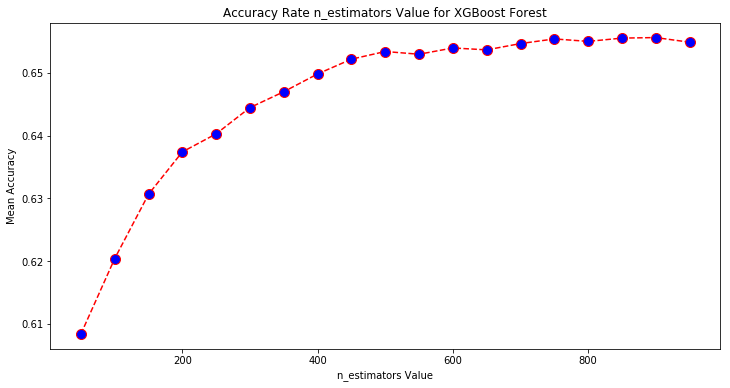

In [39]:
plt.figure(figsize=(12, 6))  
plt.plot(n_estimators,accuracy, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Rate n_estimators Value for XGBoost Forest')  
plt.xlabel('n_estimators Value')  
plt.ylabel('Mean Accuracy')  
plt.show()

### Support Vector Machine: Accuracy 64%, Slow

In [40]:
clf = svm.SVC(gamma='scale')
clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [41]:
y_pred=clf.predict(X_test)

In [43]:
np.mean(y_pred == y_test)

0.6383813718222648